In [1]:
%matplotlib inline

# Load the python modules
import SimpleITK as sitk
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.append('../src')
import imagedisplay

### Contrast Enhancement

In [2]:
def contrast(image, c=1, gamma=2.2):
    return c* pow(image, gamma)

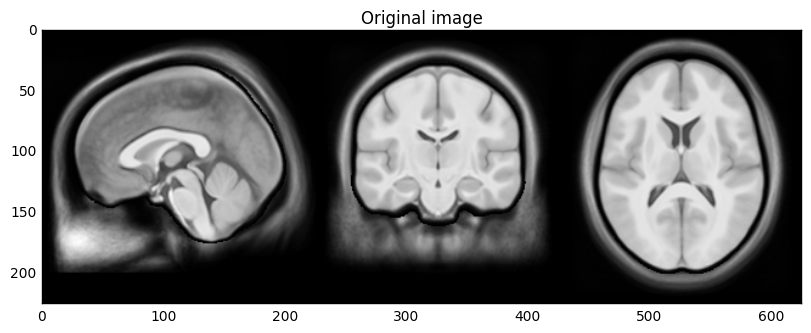

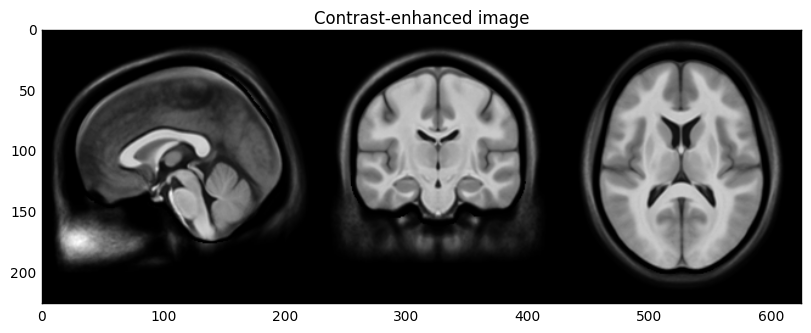

In [3]:
# Convert image to python array
imagefilename = "../sample_data/image.nii.gz"
image = sitk.ReadImage(imagefilename)
data = sitk.GetArrayFromImage(image)

gamma = 2.2;
corr_constant = 1.0;
data2 = contrast(data, corr_constant, gamma)

image2 = sitk.GetImageFromArray(data2)
image2.CopyInformation(image)
imageSize = image2.GetSize()

slices = [ image[imageSize[0]/2,:,::-1],
           image[:,imageSize[1]/2,::-1], 
           image[:,:,imageSize[2]/2] ]
imagedisplay.myshow(sitk.Tile(slices, [3,1]), title="Original image", dpi=28)

slices2 =[ image2[imageSize[0]/2,:,::-1],
           image2[:,imageSize[1]/2,::-1],
           image2[:,:,imageSize[2]/2] ]
imagedisplay.myshow(sitk.Tile(slices2, [3,1]), title="Contrast-enhanced image", dpi=28)

### Histogram of intensity values

In [4]:
# Read the input image
image = sitk.ReadImage(imagefilename)

In [5]:
# Read maximum and minimum intensity values
stats = sitk.StatisticsImageFilter()
stats.Execute( image )
max = stats.GetMaximum()
min = stats.GetMinimum()
print 'Min intensity = {0} \nMax intensity = {1}'.format(min, max)

Min intensity = 0.0 
Max intensity = 255.0


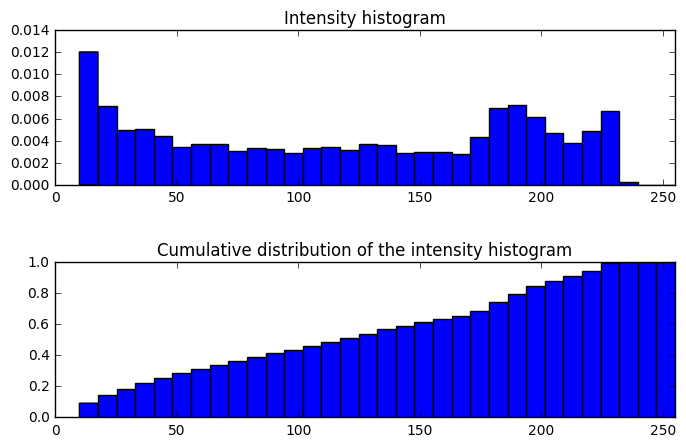

In [6]:
# Plot the intensity histogram
data = sitk.GetArrayFromImage(image)
plt.figure(figsize=(8, 5), dpi=100)
plt.subplot(211)
plt.hist(data.flatten(), bins=32, range=(10, 255), normed=True)
plt.xlim(0,255)
plt.title('Intensity histogram')
plt.subplots_adjust(hspace=.5)
plt.subplot(212)
plt.hist(data.flatten(), bins=32, range=(10, 255), normed=True, cumulative=True)
plt.xlim(0,255)
plt.title('Cumulative distribution of the intensity histogram')
plt.show()

### Histogram equalization

In [7]:
def histeq(image, nbins=256):
    
    # Compute image histogram
    histo,bins = np.histogram(image.flatten(),nbins,normed=True)
    
    # Compute cumulative distribution function and normalize
    cdf = histo.cumsum()    
    cdf = 255 * cdf / cdf[-1]
    
    # Use linear interpolation of cdf to find new pixel values
    image2 = np.interp(image.flatten(),bins[:-1],cdf)
                    
    return image2.reshape(image.shape)

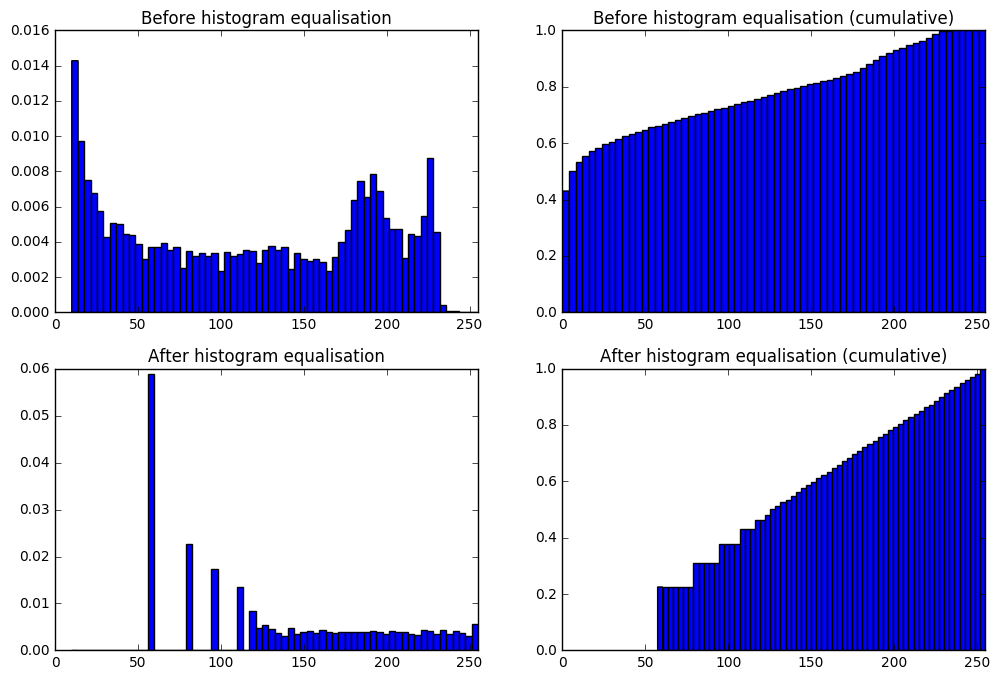

In [8]:
image = sitk.ReadImage(imagefilename)
data = sitk.GetArrayFromImage(image)
data2 = histeq(data,nbins=256)

# Plot histogram before equalisation
plt.figure(figsize=(12, 8), dpi=100)
plt.subplot(221)
plt.hist(data.flatten(),range=(10, 255), bins=64, normed=True)
plt.xlim(0,255)
plt.title('Before histogram equalisation')
plt.subplot(222)
plt.hist(data.flatten(), bins=64, normed=True, cumulative=True)
plt.xlim(0,255)
plt.title('Before histogram equalisation (cumulative)')

plt.subplot(223)
plt.hist(data2.flatten(),range=(10, 255), bins=64, normed=True)
plt.xlim(0,255)
plt.title('After histogram equalisation')
plt.subplot(224)
plt.hist(data2.flatten(), bins=64, normed=True, cumulative=True)
plt.xlim(0,255)
plt.title('After histogram equalisation (cumulative)')
plt.show()

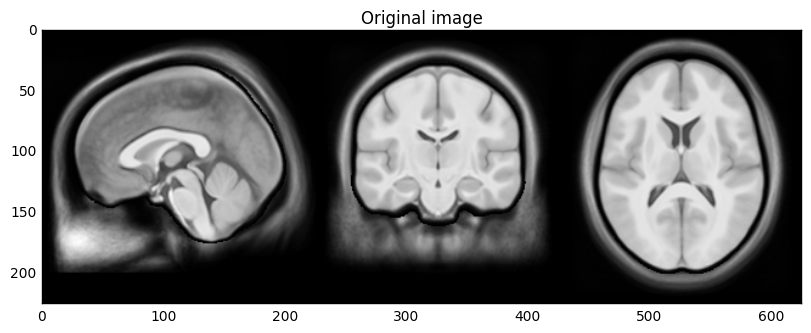

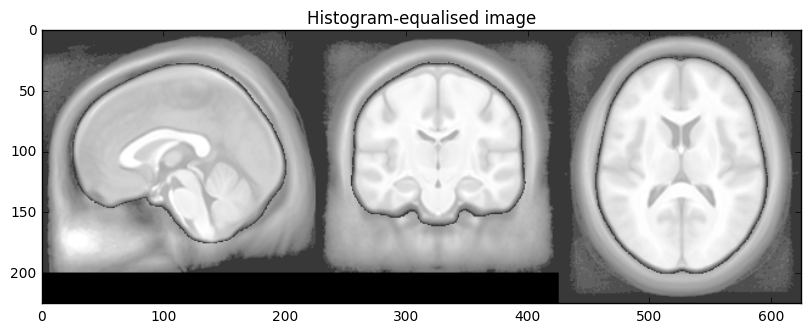

In [9]:
# Create image from array and copy header from old image
image2 = sitk.GetImageFromArray(data2)
image2.CopyInformation(image)
imageSize = image2.GetSize()

slices = [ image[imageSize[0]/2,:,::-1], 
           image[:,imageSize[1]/2,::-1], 
           image[:,:,imageSize[2]/2] ]
imagedisplay.myshow(sitk.Tile(slices, [3,1]), title="Original image", dpi=28)

slices2 =[ image2[imageSize[0]/2,:,::-1], 
           image2[:,imageSize[1]/2,::-1], 
           image2[:,:,imageSize[2]/2] ]
imagedisplay.myshow(sitk.Tile(slices2, [3,1]), title="Histogram-equalised image", dpi=28)